In [9]:
import seaborn as sns
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

from scipy import stats
from sklearn import metrics
from sklearn.cluster import KMeans
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

### **Step 1: Problem Identification and Scope**
Our project will be an AI algorithm that can effectively analyze the collected data and identify patterns associated with high anxiety levels. This algorithm should be capable of accurately predicting anxiety levels and flagging students who are at a higher risk.

Problem Definition: Identify students with possible high anxiety levels to address their issues and offer them a quicker help response.

Target Audience: Students, particularly the ones with high anxiety levels, would benefit from this AI. School counsellors would too, as it would help them offer help to the ones that need it.

Scope and Constraints: Ensuring that the data collected and analyzed adheres to privacy regulations and ethical guidelines to protect the students' confidentiality and rights.

Success Criteria: Accurately predicting the anxiety levels of students, and identifying those who are more at risk of suffering anxiety. MSE less than 4, R squared more than 0.6.

### **Step 2: Data Collection and Preparation**

We obtained our data from a dataset available on Kaggle, an online community of data scientists and machine learning practitioners under Google LLC. The dataset contains around 20 features that create the most impact on the anxiety of a Student. The features were selected scientifically considering one of the major factors provided in the dataset:

Data Attributes: 
Psychological Factors => 'anxiety_level', 'self_esteem', 'mental_health_history', 'depression',
Physiological Factors => 'headache', 'blood_pressure', 'sleep_quality', 'breathing_problem
Environmental Factors => 'noise_level', 'living_conditions', 'safety', 'basic_needs',
Academic Factors => 'academic_performance', 'study_load', 'teacher_student_relationship', 'future_career_concerns',
Social Factor => 'social_support', 'peer_pressure', 'extracurricular_activities', 'bullying'


Data Sources: Kaggle


Collection Method: Survey & others

Data Cleaning: 
For missing values, we will opt for methods like mean, median or mode imputation to approximate the missing values. If the amount of missing data is substantial and imputation isn’t feasible we will drop the rows with missing values.
Concerning the outliers, we'll begin by identifying them using the statistical method Z-score. Once identified, we can choose to either remove the outliers if they are due to data entry errors or retain them if they represent valid data points. In some cases, we might opt for winsorization.
Inconsistencies can be handled by carefully examining the data and applying domain knowledge to resolve the inconsistencies, like verifying the data with external sources and making logical assumptions to correct the inconsistencies.

In [10]:
# Data Source
csv_url = r"/home/abaca/AI_Project2023/StressLevelDataset.csv"
df = pd.read_csv(csv_url)

# Data Cleaning
print("\nAre there any missing points in the dataset?:", df.isnull().values.any())
print("Number of Duplicated Rows:", df.duplicated().sum())
# There werent any duplicated rows nor missing datapoints in the dataset.


Are there any missing points in the dataset?: False
Number of Duplicated Rows: 0


### **Step 3: Exploratory Data Analysis (EDA)**

Data set: https://www.kaggle.com/datasets/rxnach/student-stress-factors-a-comprehensive-analysis 
- Importance of statistics in understanding your data. 
- Role of graphs, charts, and plots in visualizing data. 
- Patterns, trends, or correlations within the data. 

Exploratory Data Analysis helps in making data-driven decisions by allowing us to visualize data in a useful way.

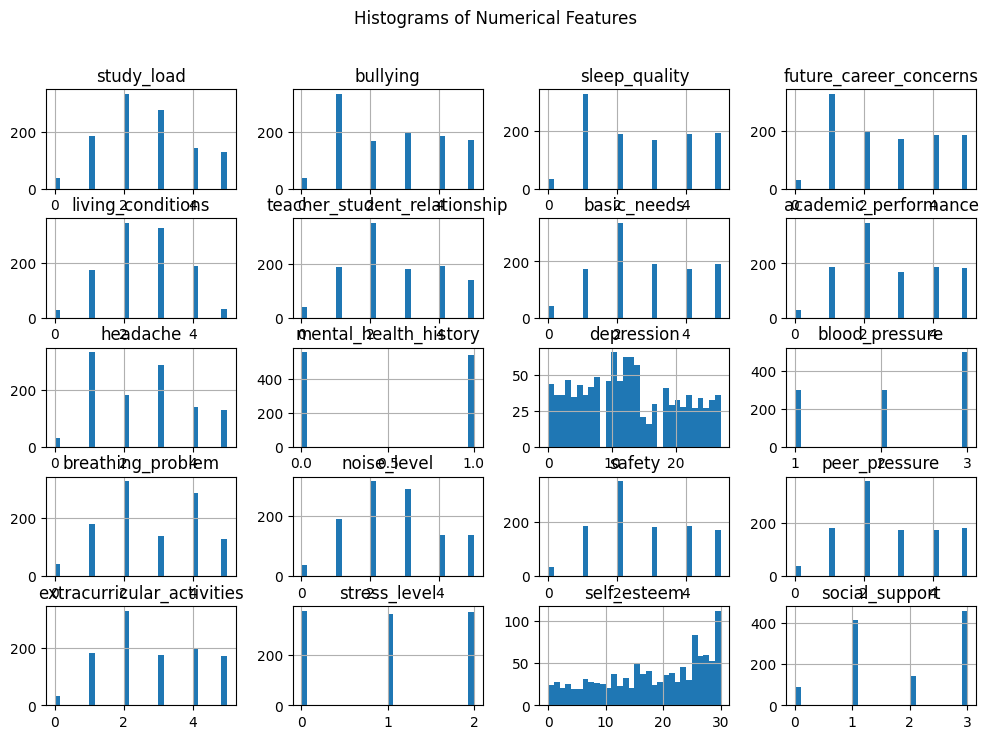

In [11]:
# STEP 3: Exploratory Data Analysis
features = ['study_load', 'bullying', 'sleep_quality', 'future_career_concerns', 'living_conditions',
            'teacher_student_relationship', 'basic_needs', 'academic_performance', 'headache', 'mental_health_history',
            'depression', 'blood_pressure', 'breathing_problem', 'noise_level', 'safety', 'peer_pressure',
            'extracurricular_activities', 'stress_level', 'self_esteem', 'social_support']
df[features].hist(bins=30, figsize=(12, 8))
plt.suptitle('Histograms of Numerical Features')
plt.show()

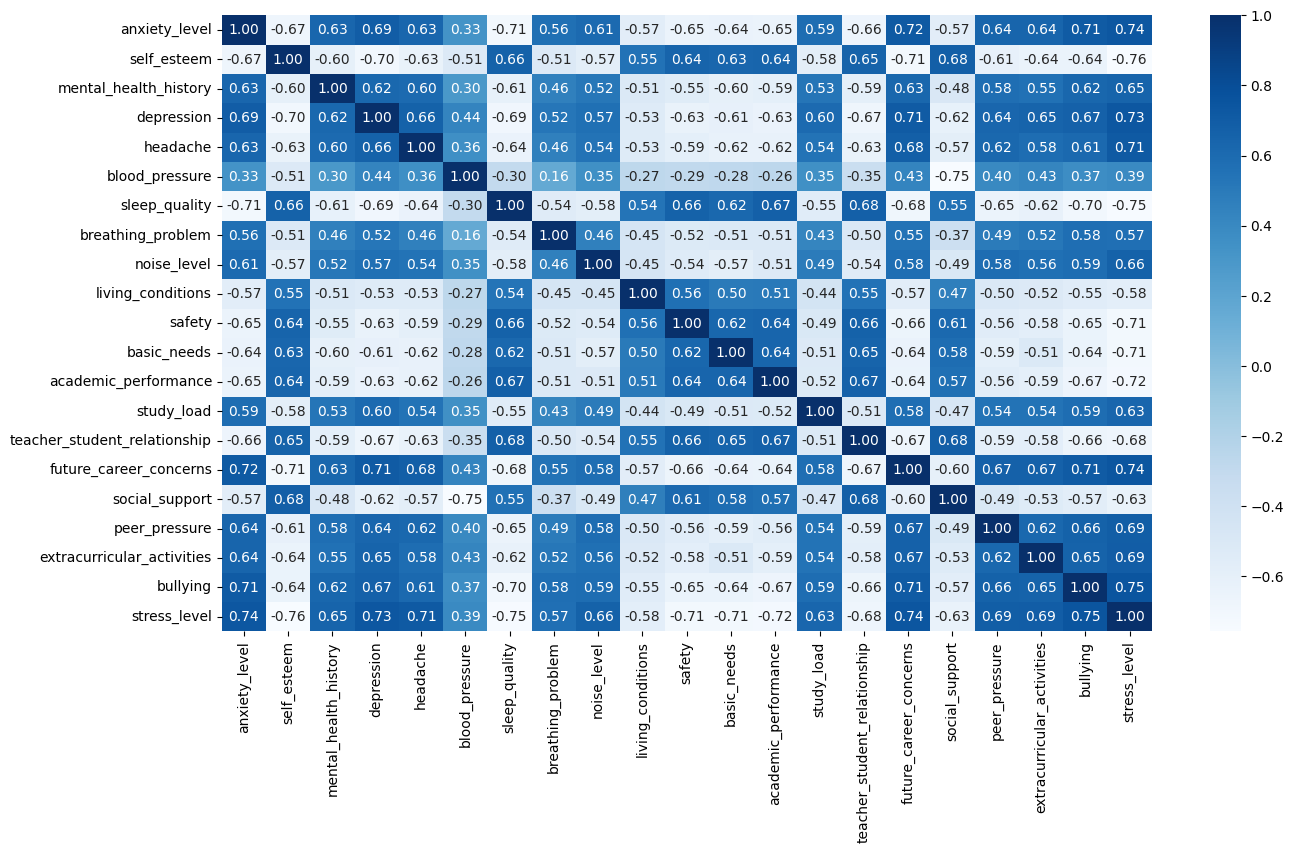

In [12]:
plt.figure(figsize=(15,8))
sns.heatmap(df.corr(), cmap='Blues', annot=True, fmt=".2f");

The most useful graph:

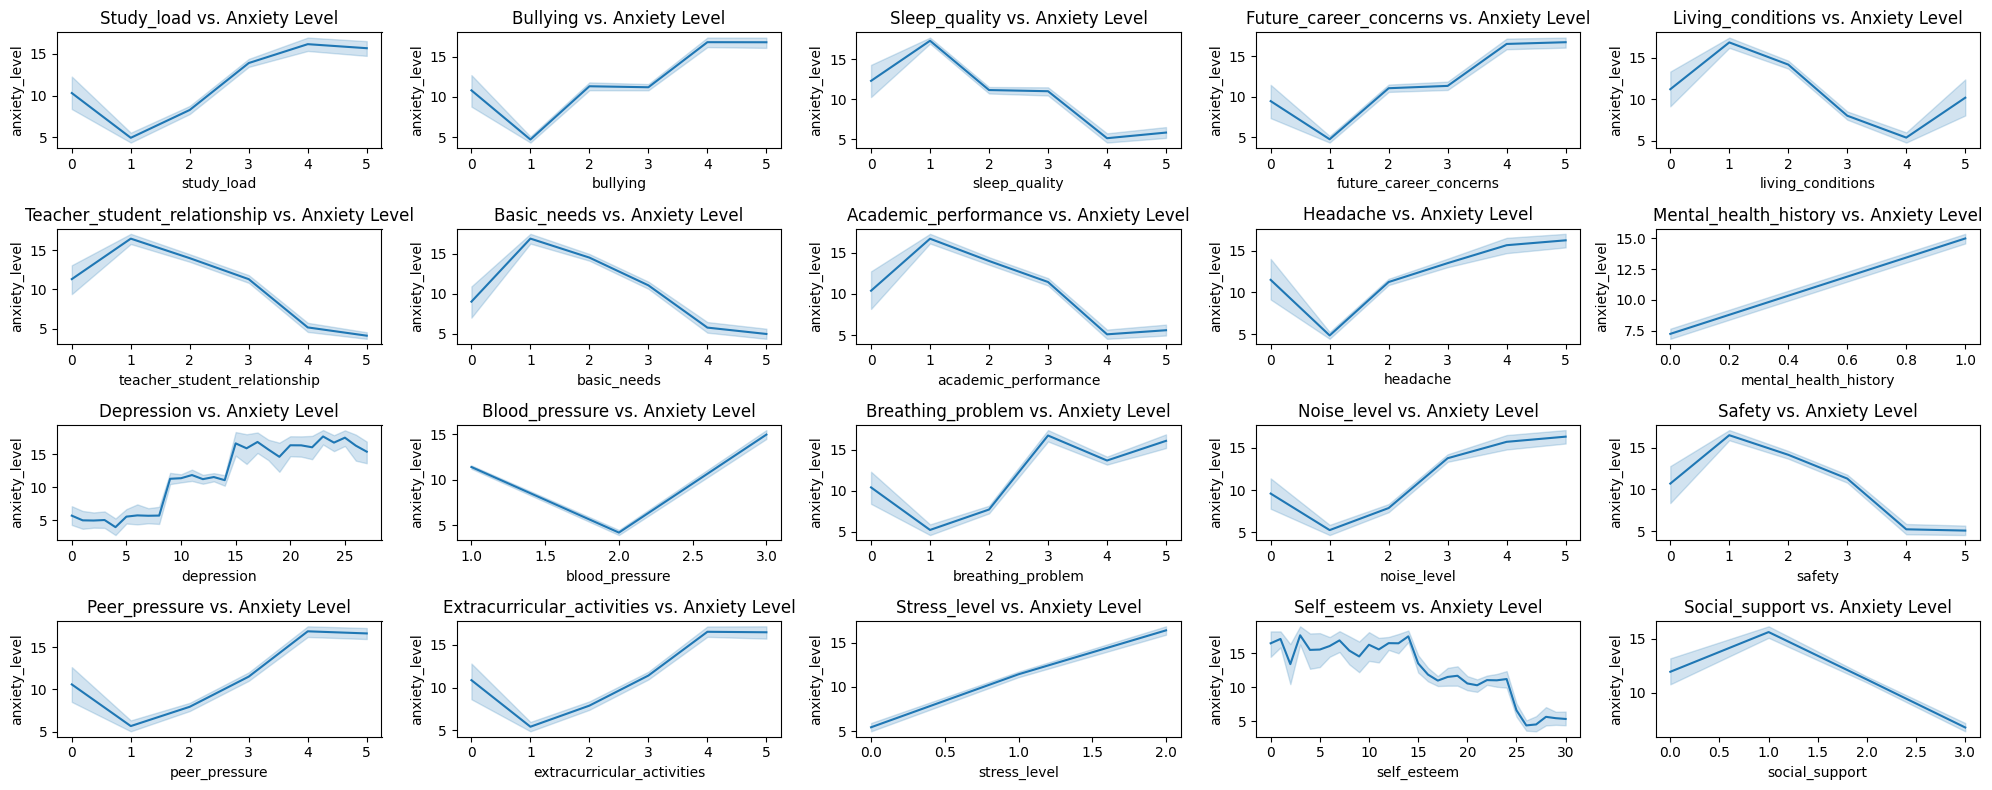

In [13]:
num_rows = int(np.ceil(len(features) / 5))
num_cols = 5

fig, axes = plt.subplots(num_rows, num_cols, figsize=(20, 2 * num_rows))
axes = axes.flatten()

# Iterate through features and plot on respective subplots
for i, feature in enumerate(features):
    sns.lineplot(x=feature, y='anxiety_level', data=df, ax=axes[i])
    axes[i].set_title(f'{feature.capitalize()} vs. Anxiety Level')

plt.tight_layout()
plt.show()

### **Step 4: Model Selection and Design**

Model Research: Linear regression is a classic and widely used model for predicting a continuous variable, making it a suitable choice for your regression task. It assumes a linear relationship between the input features and the target variable, making it interpretable and easy to implement. Linear regression is well-suited when the relationships between the features and the target variable can be approximated well by a linear equation.

Model Architecture: It calculates the weighted sum of the input features and adds a bias term to make predictions. In our case, the features are all of the factors mentioned above, and the model would predict the students’ anxiety level. 
Anxiety_Level = w0​ + w1​ × Factor 1 + w2 × Factor 2...

Rationale: Linear regression is chosen for its simplicity, interpretability, and ease of implementation. In the context of predicting anxiety levels based on a variety of factors, it allows us to establish a clear linear relationship between these factors. 

In [14]:
df['anxiety_level_transform'] = stats.boxcox(df['anxiety_level'].replace(0,0.1))[0]
df.head()

,anxiety_level,self_esteem,mental_health_history,depression,headache,blood_pressure,sleep_quality,breathing_problem,noise_level,living_conditions,...,academic_performance,study_load,teacher_student_relationship,future_career_concerns,social_support,peer_pressure,extracurricular_activities,bullying,stress_level,anxiety_level_transform
0,14,20,0,11,2,1,2,4,2,3,...,3,2,3,3,2,3,3,2,1,8.544197
1,15,8,1,15,5,3,1,4,3,1,...,1,4,1,5,1,4,5,5,2,9.078469
2,12,18,1,14,2,1,2,2,2,2,...,2,3,3,2,2,3,2,2,1,7.447696
3,16,12,1,15,4,3,1,3,4,2,...,2,4,1,4,1,4,4,5,2,9.604448
4,16,28,0,7,2,3,5,1,3,2,...,4,3,1,2,1,5,0,5,1,9.604448


In [15]:
# Define X (features) and y (target) and remove duplicate features that will not be used in the model
X = df.drop(['anxiety_level', 'anxiety_level_transform'], axis=1)
y = df['anxiety_level_transform']

# Split the dataset into X_train, X_test, y_train, and y_test, 10% of the data for testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=0)

# Instantiate a linear regression model
linear_model = LinearRegression()

### **Step 5: Model Training and Evaluation**

Training Process: The training process involves fitting the linear regression model to the prepared training data, which includes the features (factors) and the target variable (anxiety level). The model learns the weights that minimize the difference between the predicted anxiety levels and the actual values in the training set. 

- Fine-Tuning: /
- Validation: Stress the significance of validating your model with separate validation data to ensure it generalizes well. 

In [16]:
linear_model.fit(X_train, y_train)
y_pred = linear_model.predict(X_test)

In [17]:
num_samples_to_view = 3

for i in range(num_samples_to_view):
    print('===================================================')
    print(f'Test Sample #{i+1}')
    print()
    print(X_test.iloc[[i]])
    print()
    print(f'Actual Anxiety Level: {y_test.iloc[i]}')
    print(f'Predicted Anxiety Level: {y_pred[i]}')

    print()

Test Sample #1

     self_esteem  mental_health_history  depression  headache  blood_pressure  \
395           25                      0           6         1               2   

     sleep_quality  breathing_problem  noise_level  living_conditions  safety  \
395              5                  1            1                  3       5   

     basic_needs  academic_performance  study_load  \
395            4                     4           1   

     teacher_student_relationship  future_career_concerns  social_support  \
395                             4                       1               3   

     peer_pressure  extracurricular_activities  bullying  stress_level  
395              1                           1         1             0  

Actual Anxiety Level: 3.172202535449332
Predicted Anxiety Level: 2.1296504161693557

Test Sample #2

     self_esteem  mental_health_history  depression  headache  blood_pressure  \
860           15                      1          11         3    

In [18]:
# Model evaluation metrics
print("Mean squared error (MSE) =", metrics.mean_squared_error(y_test, y_pred))
print("Mean absolute error (MAE) =", metrics.mean_absolute_error(y_test, y_pred))
print("R^2 =", metrics.r2_score(y_test, y_pred))

Mean squared error (MSE) = 3.9742672240876495
Mean absolute error (MAE) = 1.5415728082771432
R^2 = 0.658452842554011
